In [15]:
import ROOT as r
import numpy as np
import math

---

# ROOT File Structure

### Lets create a simple file to examine the root file structure

Based on: https://root.cern.ch/root/htmldoc/guides/users-guide/InputOutput.html

---

In [16]:
f = r.TFile("./example_file.root", "RECREATE")
f.ls()

TFile**		./example_file.root	
 TFile*		./example_file.root	


In [17]:
hists = []
for i in range(10):
    h = r.TH1D("h"+str(i),"Histogram "+str(i), 100,-10,10)
    h.FillRandom("gaus",1000*(i+1))
    hists.append(h.Clone("h"+str(i)))
    hists[i].Write()

In [18]:
f.ls()

TFile**		./example_file.root	
 TFile*		./example_file.root	
  OBJ: TH1D	h0	Histogram 0 : 0 at: 0x555dd71b00d0
  OBJ: TH1D	h1	Histogram 1 : 0 at: 0x555dd71a58a0
  OBJ: TH1D	h2	Histogram 2 : 0 at: 0x555dd71a4b40
  OBJ: TH1D	h3	Histogram 3 : 0 at: 0x555dd71a2890
  OBJ: TH1D	h4	Histogram 4 : 0 at: 0x555dd6fac360
  OBJ: TH1D	h5	Histogram 5 : 0 at: 0x555dd69d9990
  OBJ: TH1D	h6	Histogram 6 : 0 at: 0x555dd5c6b900
  OBJ: TH1D	h7	Histogram 7 : 0 at: 0x555dd68d4b50
  OBJ: TH1D	h8	Histogram 8 : 0 at: 0x555dd5c7e290
  OBJ: TH1D	h9	Histogram 9 : 0 at: 0x555dd5c95ea0
  OBJ: TH1D	h9	Histogram 9 : 0 at: 0x555dd5c8fee0
  KEY: TH1D	h0;1	Histogram 0
  KEY: TH1D	h1;1	Histogram 1
  KEY: TH1D	h2;1	Histogram 2
  KEY: TH1D	h3;1	Histogram 3
  KEY: TH1D	h4;1	Histogram 4
  KEY: TH1D	h5;1	Histogram 5
  KEY: TH1D	h6;1	Histogram 6
  KEY: TH1D	h7;1	Histogram 7
  KEY: TH1D	h8;1	Histogram 8
  KEY: TH1D	h9;1	Histogram 9


In [19]:
f.Map()

20200716/143426  At:100    N=134       TFile         
20200716/143426  At:234    N=388       TH1D           CX =  3.61
20200716/143426  At:622    N=395       TH1D           CX =  3.54
20200716/143426  At:1017   N=398       TH1D           CX =  3.52
20200716/143426  At:1415   N=407       TH1D           CX =  3.44
20200716/143426  At:1822   N=409       TH1D           CX =  3.42
20200716/143426  At:2231   N=413       TH1D           CX =  3.39
20200716/143426  At:2644   N=415       TH1D           CX =  3.37
20200716/143426  At:3059   N=414       TH1D           CX =  3.38
20200716/143426  At:3473   N=417       TH1D           CX =  3.35
20200716/143426  At:3890   N=419       TH1D           CX =  3.34
20200716/143426  At:4309   N=1         END           


In [20]:
keys = f.GetListOfKeys()
for x in keys:
    print(type(x), " --- ", x )
    hi = x.ReadObj()
    print("--->", hi , "/", type(hi))

<class cppyy.gbl.TKey at 0x555dd68d3a10>  ---  Name: h0 Title: Histogram 0
---> Name: h0 Title: Histogram 0 NbinsX: 100 / <class cppyy.gbl.TH1D at 0x555dd6836890>
<class cppyy.gbl.TKey at 0x555dd68d3a10>  ---  Name: h1 Title: Histogram 1
---> Name: h1 Title: Histogram 1 NbinsX: 100 / <class cppyy.gbl.TH1D at 0x555dd6836890>
<class cppyy.gbl.TKey at 0x555dd68d3a10>  ---  Name: h2 Title: Histogram 2
---> Name: h2 Title: Histogram 2 NbinsX: 100 / <class cppyy.gbl.TH1D at 0x555dd6836890>
<class cppyy.gbl.TKey at 0x555dd68d3a10>  ---  Name: h3 Title: Histogram 3
---> Name: h3 Title: Histogram 3 NbinsX: 100 / <class cppyy.gbl.TH1D at 0x555dd6836890>
<class cppyy.gbl.TKey at 0x555dd68d3a10>  ---  Name: h4 Title: Histogram 4
---> Name: h4 Title: Histogram 4 NbinsX: 100 / <class cppyy.gbl.TH1D at 0x555dd6836890>
<class cppyy.gbl.TKey at 0x555dd68d3a10>  ---  Name: h5 Title: Histogram 5
---> Name: h5 Title: Histogram 5 NbinsX: 100 / <class cppyy.gbl.TH1D at 0x555dd6836890>
<class cppyy.gbl.TKey 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


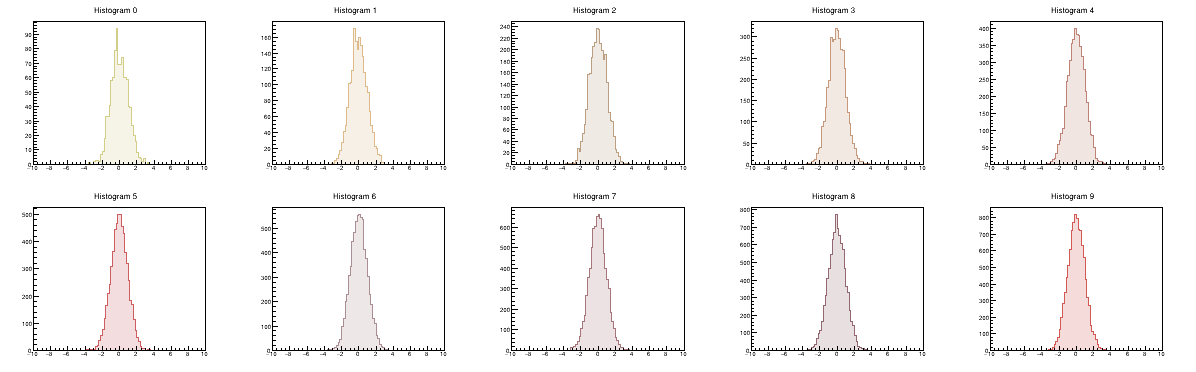

In [21]:
c = r.TCanvas("c","c",1200,400)
c.Divide(5,2)
for i in range(10):
    c.cd(i+1)
    hi = f.Get("h"+str(i))
    hi.SetLineColor(i+41)
    hi.SetFillColorAlpha(i+41,0.2)
    hi.DrawCopy()
c.Draw()

### We can also create a tree and add it to the file

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


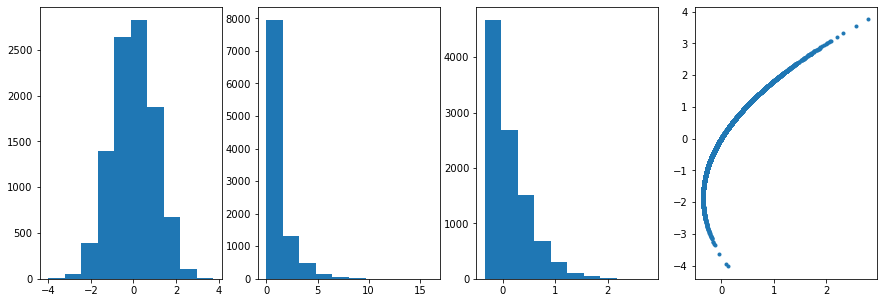

In [22]:
#fake data
x = np.random.normal(size=10000)
y = np.array([xi**2 for xi in x])
time = np.array([0.371*x[i]+y[i]/10. for i in range(len(x))])

print(type(x), type(y), type(time))

fig,ax = plt.subplots(1,4,figsize=(15,5))
ax[0].hist(x)
ax[1].hist(y)
ax[2].hist(time)
ax[3].plot(time,x,".")
plt.show()

In [23]:
print(x[:10])
print(y[:10])

[ 0.07680288  0.42353431  0.85684875  0.65882808  1.34852635 -0.84188848
  2.02045249  0.11627499  0.29424359  0.75201409]
[0.00589868 0.17938131 0.73418978 0.43405444 1.81852332 0.70877621
 4.08222828 0.01351987 0.08657929 0.5655252 ]


In [24]:
tree = r.TTree("tree","Example tree")

xi = np.array([0.0]) #not the ideal way to go about this
yi = np.array([0.0])
timei = np.array([0.0])

tree.Branch("x", xi, "x/D")
tree.Branch("y", yi, "y/D")
tree.Branch("t", timei, "time in fill/D")

for i in range(len(x)):
    xi[0] = x[i]
    yi[0] = y[i]
    timei[0] = time[i]
    tree.Fill()

In [25]:
tree.Print()

******************************************************************************
*Tree    :tree      : Example tree                                           *
*Entries :    10000 : Total =          242649 bytes  File  Size =     184413 *
*        :          : Tree compression factor =   1.04                       *
******************************************************************************
*Br    0 :x         : x/D                                                    *
*Entries :    10000 : Total  Size=      80773 bytes  File Size  =      61645 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.04     *
*............................................................................*
*Br    1 :y         : y/D                                                    *
*Entries :    10000 : Total  Size=      80773 bytes  File Size  =      61345 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.04     *
*...................................................

In [26]:
for i, e in enumerate(tree):
    if i > 9:
        break
    print(i, e.x, e.y, e.t)

0 0.07680288295544199 0.0058986828302673225 0.02908373785949571
1 0.4235343126321869 0.17938131397681903 0.17506936138422324
2 0.8568487513195941 0.7341897826379477 0.3913098650033642
3 0.6588280774547093 0.43405443564266843 0.28783066029996396
4 1.3485263523734294 1.8185233230455868 0.682155609035101
5 -0.8418884755693915 0.7087762052965539 -0.2414630039065888
6 2.0204524945877664 4.082228282885929 1.1578107037806542
7 0.11627498943340239 0.013519873167737837 0.044490008396566076
8 0.2942435880251433 0.08657928909391024 0.11782230006671919
9 0.7520140943931839 0.5655251981660006 0.33554974883647126


### For ROOT 6.22+ this is out of date

From: https://notebooks.gesis.org/binder/jupyter/user/stwunsch-pyhep2020-pyroot-uij5c9r9/notebooks/interoperability.ipynb

_From numpy arrays to ROOT files_

PyROOT supports to create a ROOT::RDataFrame from numpy arrays, which allows to further transform the dataset and eventually write the data back to disk in a ROOT file.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


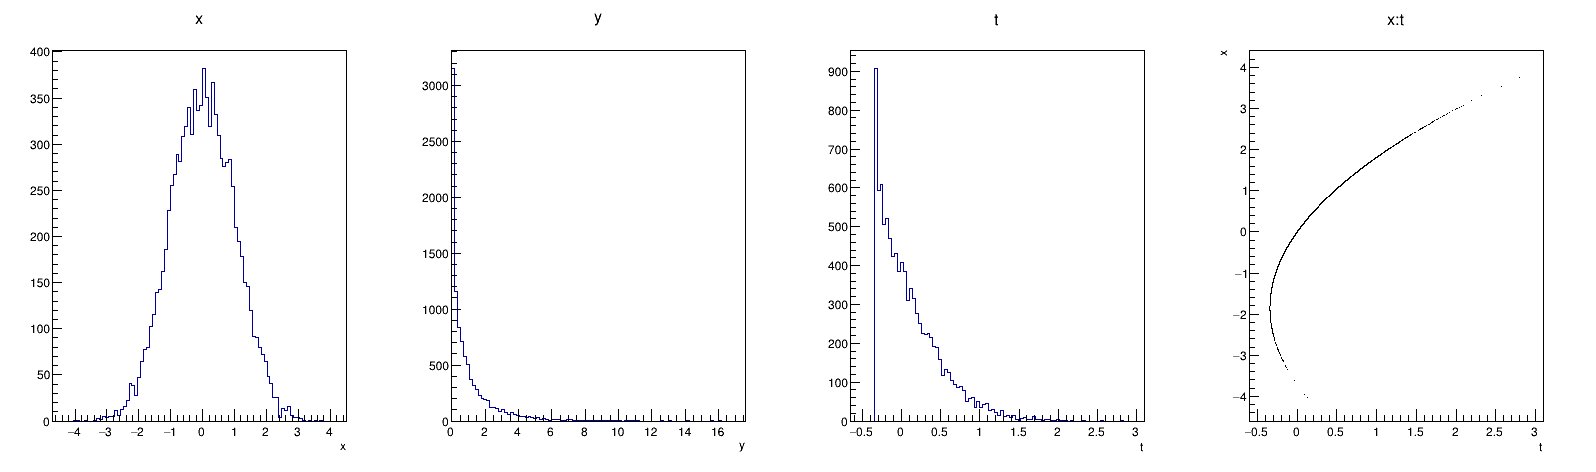

In [27]:
c = r.TCanvas("c","c",1600,500)
c.Divide(4)
c.cd(1)
tree.Draw("x")
c.cd(2)
tree.Draw("y")
c.cd(3)
tree.Draw("t")
c.cd(4)
tree.Draw("x:t")
c.Draw()

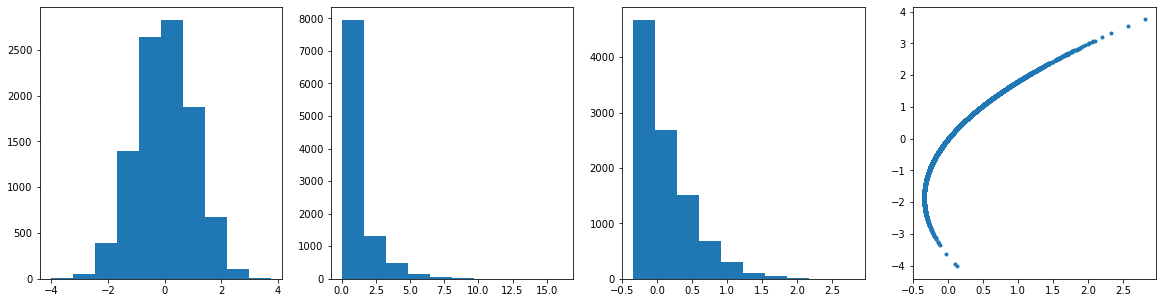

In [28]:
fig,ax = plt.subplots(1,4,figsize=(20,5))
ax[0].hist(x)
ax[1].hist(y)
ax[2].hist(time)
ax[3].plot(time,x,".")
plt.show()

In [29]:
# when we're done with a file, close it
f.Close()

---

### Now lets look at a real data file and see how things get more complicated

In [30]:
f2 = r.TFile("./gm2offline_ana_22530535_16119.00442.root")
f2.ls()

TFile**		./gm2offline_ana_22530535_16119.00442.root	
 TFile*		./gm2offline_ana_22530535_16119.00442.root	
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder


In [31]:
for x in f2.GetListOfKeys():
    print(x, type(x))
    farline = x.ReadObj()
    print("--->",farline, type(farline))

Name: farline Title: farline (CaloFarlineHistograms) folder <class cppyy.gbl.TKey at 0x555dd68d3a10>
---> Name: farline Title: farline (CaloFarlineHistograms) folder <class cppyy.gbl.TDirectoryFile at 0x555dd661fd60>


In [32]:
for x in farline.GetListOfKeys():
    print(x, " / ", type(x))
    print("--->",type(x.ReadObj()))

Name: calo1 Title: calo1  /  <class cppyy.gbl.TKey at 0x555dd68d3a10>
---> <class cppyy.gbl.TDirectoryFile at 0x555dd661fd60>
Name: calo2 Title: calo2  /  <class cppyy.gbl.TKey at 0x555dd68d3a10>
---> <class cppyy.gbl.TDirectoryFile at 0x555dd661fd60>
Name: calo3 Title: calo3  /  <class cppyy.gbl.TKey at 0x555dd68d3a10>
---> <class cppyy.gbl.TDirectoryFile at 0x555dd661fd60>
Name: calo4 Title: calo4  /  <class cppyy.gbl.TKey at 0x555dd68d3a10>
---> <class cppyy.gbl.TDirectoryFile at 0x555dd661fd60>
Name: calo5 Title: calo5  /  <class cppyy.gbl.TKey at 0x555dd68d3a10>
---> <class cppyy.gbl.TDirectoryFile at 0x555dd661fd60>
Name: calo6 Title: calo6  /  <class cppyy.gbl.TKey at 0x555dd68d3a10>
---> <class cppyy.gbl.TDirectoryFile at 0x555dd661fd60>
Name: calo7 Title: calo7  /  <class cppyy.gbl.TKey at 0x555dd68d3a10>
---> <class cppyy.gbl.TDirectoryFile at 0x555dd661fd60>
Name: calo8 Title: calo8  /  <class cppyy.gbl.TKey at 0x555dd68d3a10>
---> <class cppyy.gbl.TDirectoryFile at 0x555dd6

### As an example, lets say we want to plot all of the histograms in the 'farline' directory (non-recursively). We can do this as follows:

---

## Now lets look at a TTree more specifically

---

### If you know where something is, you can get it by its *absolute* path (it doesn't matter how many f.cd(...) commands you've run

In [34]:
t2 = f2.Get("farline/eventTree")
# print(t2, "/", type(t2))

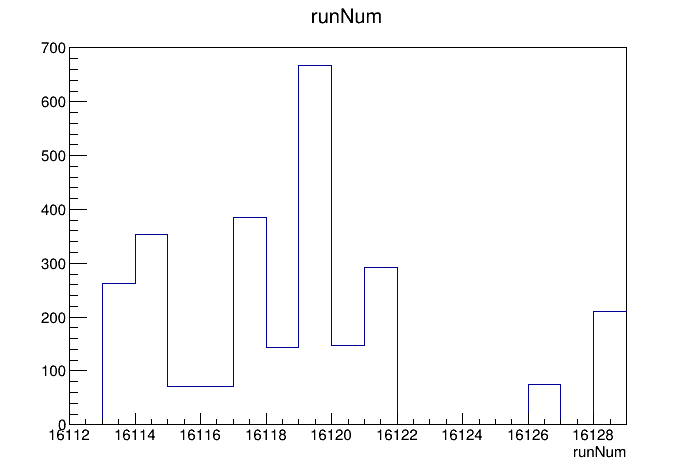

In [35]:
c = r.TCanvas()
t2.Draw("runNum")
c.Draw()

### You can convert the other direction more easily, from Branch of a TTree to a NumPy array

In [36]:
arr_run = t2.AsMatrix(columns=['runNum'])

(array([615.,  71., 456., 144., 816., 292.,   0.,   0.,  74., 210.]),
 array([16113. , 16114.5, 16116. , 16117.5, 16119. , 16120.5, 16122. ,
        16123.5, 16125. , 16126.5, 16128. ]),
 <a list of 10 Patch objects>)

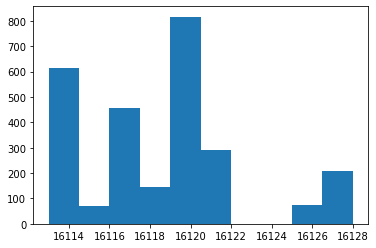

In [37]:
plt.hist(arr_run)